# **Problem Statement**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. 

The main objective is to create a book recommendation system for users.

##Content

The Book-Crossing dataset comprises 3 files.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

#Data Cleaning

In [2]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###Books Dataset

In [3]:
# importing the dataset
books_df = pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Aehteshaam Shaikh/Copy of Books.csv')

In [4]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


* There are 271360 entries and 8 columns with columns Publisher, Book-Author and Image-URL-L having some Null Vlaues 

In [6]:
# dropping the Image URL columns from tha dataset 
books_df.drop(books_df[['Image-URL-L','Image-URL-M','Image-URL-S']],axis=1, inplace = True)

In [7]:
# checking for null values in Book-Author column
books_df.loc[(books_df['Book-Author'].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [8]:
# filling the Null value in this column with 'other'
books_df.iloc[187689]['Book-Author']='other'

In [9]:
# checking for Null values in the Publisher column 
books_df.loc[(books_df['Publisher'].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [10]:
# filling the null values in this column with 'other'
books_df['Publisher'].fillna('other',inplace=True)

In [11]:
books_df['Publisher'].isnull().sum()

0

In [12]:
# Let's explore 'Year of Publication' Column
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [13]:
len(books_df['Year-Of-Publication'].unique())

202

* There is some dicrepancy in the Year of Publication column as some entries have the year as '0', "DK Publishing Inc", "Gallimard", which does not make any sense. Also, we will have to treat the entries whose year is > 2004 as this dataset itself was published in 2004.

In [14]:
books_df[books_df['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


* Here the column Book-Author contains Year of Publication and Year of Publication column contains Publisher.

* Let's check if Author's name is mentioned in the title of book.

In [15]:
# checking for the Author's Name
books_df.iloc[209538]['Book-Title'], books_df.iloc[221678]['Book-Title']

('DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"',
 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"')

In [16]:
# fixing all the values
books_df.iloc[209538]['Book-Title']='DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books_df.iloc[221678]['Book-Title']='DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'


books_df.iloc[209538]['Book-Author']='Michael Teitelbaum'
books_df.iloc[221678]['Book-Author']='James Buckley'

books_df.iloc[209538]['Year-Of-Publication']=2000
books_df.iloc[221678]['Year-Of-Publication']=2000

books_df.iloc[209538]['Publisher']= 'DK Publishing Inc'
books_df.iloc[221678]['Publisher']= 'DK Publishing Inc'

In [17]:
# simillarly for 'Gallimard'
books_df[books_df['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [18]:
# checking for the Author's name
books_df.iloc[220731]['Book-Title']

'Peuple du ciel, suivi de \'Les Bergers\\";Jean-Marie Gustave Le ClÃ?Â©zio"'

In [19]:
# fixing all the values
books_df.iloc[220731]['Book-Title']='Peuple du ciel, suivi de \'Les Bergers'
books_df.iloc[220731]['Book-Author']='Jean-Marie Gustave Le ClÃ?Â©zio'
books_df.iloc[220731]['Year-Of-Publication']=2003
books_df.iloc[220731]['Publisher']= 'Gallimard'

In [20]:
# Rechecking
books_df.iloc[[220731,221678,209538]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc


In [21]:
books_df['Year-Of-Publication']= books_df['Year-Of-Publication'].astype('int64')

In [22]:
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

In [23]:
round(books_df['Year-Of-Publication'].median())

1995

In [24]:
# Let's replace the entries with year '0' or greater than 2004 with median year value
books_df.loc[(books_df['Year-Of-Publication'] > 2004) | (books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN
books_df['Year-Of-Publication'].fillna(round(books_df['Year-Of-Publication'].median()),inplace=True)

In [25]:
books_df['Year-Of-Publication'].isnull().sum()

0

In [26]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

* Now there are no null values...

###Users Dataset

In [27]:
users_df = pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Aehteshaam Shaikh/Copy of Users.csv')

In [28]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [29]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


* This dataset consists of 3 features with 278858 entries with 'Age' column having Null Values.

In [30]:
users_df['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

* Here, the values below the age of 5 and above 100 do not make any sense hence we can replace them.

In [31]:
users_df.loc[(users_df['Age']<5) | (users_df['Age']>100), 'Age'] = np.NAN

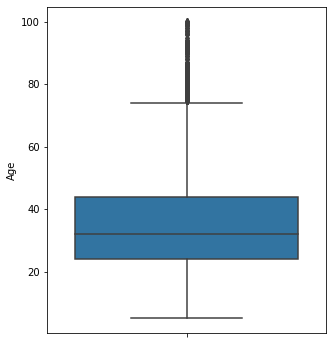

In [32]:
# Checking for Outliers in Age column
plt.figure(figsize=(5,6))
sns.boxplot(y=users_df['Age']);

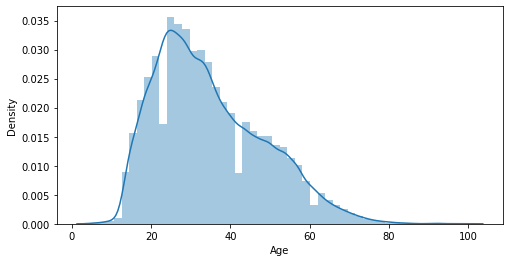

In [33]:
# distribution of Age column
plt.figure(figsize=(8,4))
sns.distplot(users_df['Age']);

* The feature Age is Rightly skewed. Replacing Null values with Median value

In [34]:
users_df['Age'].median()

32.0

In [35]:
users_df['Age'].fillna(users_df['Age'].median(),inplace=True)

In [36]:
users_df.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

* No Null values are present now....

In [37]:
# Let's Explore Location column
users_df['Location'][0:9]

0                    nyc, new york, usa
1             stockton, california, usa
2       moscow, yukon territory, russia
3             porto, v.n.gaia, portugal
4    farnborough, hants, united kingdom
5         santa monica, california, usa
6                   washington, dc, usa
7              timmins, ontario, canada
8            germantown, tennessee, usa
Name: Location, dtype: object

* For the sake of simplicity, We can extract the Country from the Location column. 

In [38]:
for i in users_df:
    users_df['Country']=users_df['Location'].str.extract(r'\,+\s?(\w*\s?\w*)\"*$')   

In [39]:
users_df

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",32.0,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",32.0,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",32.0,united kingdom
...,...,...,...,...
278853,278854,"portland, oregon, usa",32.0,usa
278854,278855,"tacoma, washington, united kingdom",50.0,united kingdom
278855,278856,"brampton, ontario, canada",32.0,canada
278856,278857,"knoxville, tennessee, usa",32.0,usa


In [40]:
#drop location column
users_df.drop('Location',axis=1,inplace=True)

In [41]:
users_df['Country'].unique()

array(['usa', 'russia', 'portugal', 'united kingdom', 'canada', 'spain',
       'australia', 'brazil', '', 'germany', 'mexico', 'china', 'italy',
       'distrito federal', 'france', 'netherlands', 'iraq', 'finland',
       'new zealand', 'india', 'ghana', 'switzerland', 'slovenia', 'iran',
       'peru', nan, 'vietnam', 'sri lanka', 'pakistan', 'denmark',
       'belgium', 'malaysia', 'turkey', 'philippines', 'greece',
       'colombia', 'norway', 'kuwait', 'chile', 'quit', 'lj', 'taiwan',
       'españa', 'sweden', 'argentina', 'nigeria', 'london', 'bulgaria',
       'austria', 'romania', 'singapore', 'albania', 'egypt', 'tunisia',
       'uzbekistan', 'qatar', 'syria', 'saudi arabia', 'indonesia',
       'sudan', 'somewherein space', 'poland', 'thailand', 'ireland',
       'venezuela', 'paraguay', 'mozambique', 'morocco', 'afghanistan',
       'estonia', 'clackamas', 'lesotho', 'yugoslavia', 'slovakia',
       'costa rica', 'basque country', 'ethiopia', 'croatia', 'israel',
       '

In [42]:
# Let's Replace some Misspelt Countries 
users_df['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria',
                             'autralia','cananda','geermany','germay','italia','united kindgonm','united sates','united staes',
                             'united state','united states','us','urugua','indiai','canada eh','le canada'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia',
                            'canada','germany','germany','italy','united kingdom','usa','usa','usa','usa','usa',
                            'uruguay','india','canada','canada'],inplace=True)

In [43]:
# checking the null values
users_df.isnull().sum()

User-ID      0
Age          0
Country    368
dtype: int64

* Replacing the null values from country column with 'other' category.

In [44]:
users_df['Country'].fillna('other',inplace=True)

In [45]:
users_df.isnull().sum() 

User-ID    0
Age        0
Country    0
dtype: int64

###Ratings Dataset

In [46]:
ratings_df = pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Aehteshaam Shaikh/Copy of Ratings.csv')

In [47]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [48]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


* This Dataset consists 1149780 entries with 3 columns and no null values are present in it.

* Let's create a new dataset that consists of ratings for only those books that are present in our books_df dataset and for only those users who are present in our users dataset

In [49]:
ratings_df = ratings_df[ratings_df['ISBN'].isin(books_df['ISBN'])]
ratings_df = ratings_df[ratings_df['User-ID'].isin(users_df['User-ID'])]

In [50]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1149778
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1031136 non-null  int64 
 1   ISBN         1031136 non-null  object
 2   Book-Rating  1031136 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 31.5+ MB


* Some of the entries have been dropped

In [51]:
ratings_df['Book-Rating'].value_counts()

0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: Book-Rating, dtype: int64

In [52]:
# entries with rating = 0
len(ratings_df[ratings_df['Book-Rating']==0])

647294

* Since the dataset contains explicit ratings (from 1 to 10) and implicit rating (0), let's divide the dataset into two parts

In [53]:
ratings_df_explicit = ratings_df[ratings_df['Book-Rating']!=0]
ratings_df_implicit = ratings_df[ratings_df['Book-Rating']==0]

#Final Dataset

In [54]:
Final_df=users_df.copy()
Final_df=pd.merge(Final_df,ratings_df_explicit,on='User-ID')
Final_df=pd.merge(Final_df,books_df,on='ISBN')

In [55]:
Final_df.head(2)

,User-ID,Age,Country,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,32.0,canada,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,32.0,other,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


#EDA

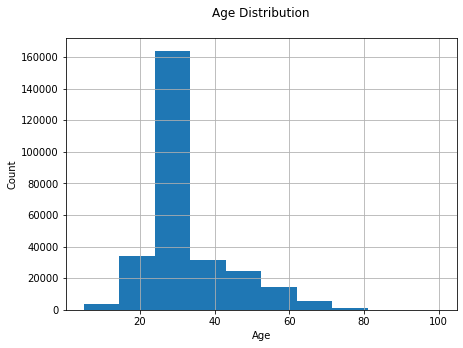

In [95]:
# Age distribution
plt.figure(figsize=(7,5))
users_df['Age'].hist()
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

* Most users are from the age group of 20 to 40  

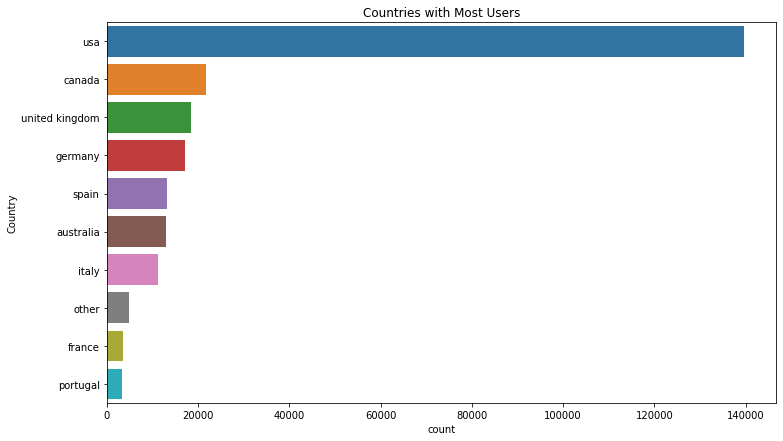

In [96]:
# Top Publishers
plt.figure(figsize=(12,7))
sns.countplot(y='Country',data=users_df,order=pd.value_counts(users_df['Country']).iloc[:10].index)
plt.title('Countries with Most Users');

* Clearly, most of the users are from the USA, followed by Canada.

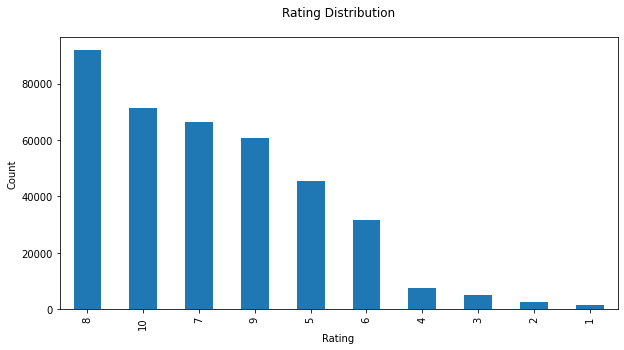

In [ ]:
# plotting ratings distribution for explicit ratings
plt.figure(figsize=(10,5))
ratings_df_explicit['Book-Rating'].value_counts().plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

* The most common rating given by the users is 8, followed by 10.

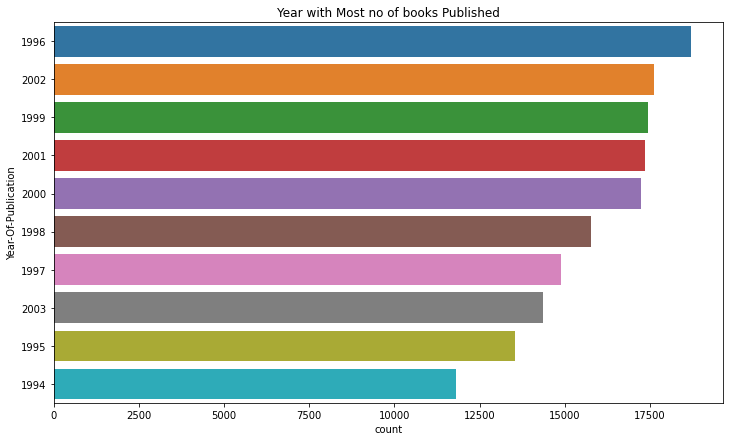

In [ ]:
# Published-Year
plt.figure(figsize=(12,7))
sns.countplot(y='Year-Of-Publication',data=books_df,order=pd.value_counts(books_df['Year-Of-Publication'].astype('int64')).iloc[:10].index)
plt.title('Year with Most no of books Published');

* The year in which most no of books were published in this dataset is  1996 followed by Year 2002.

In [ ]:
# The most popular books among users
Final_df.groupby(['Book-Title','Book-Author','Year-Of-Publication'])['Book-Rating'].count().nlargest(10).reset_index()

,Book-Title,Book-Author,Year-Of-Publication,Book-Rating
0,The Lovely Bones: A Novel,Alice Sebold,2002.0,707
1,Wild Animus,Rich Shapero,2004.0,581
2,The Da Vinci Code,Dan Brown,2003.0,488
3,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,383
4,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,320
5,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,315
6,The Summons,John Grisham,2002.0,308
7,The Secret Life of Bees,Sue Monk Kidd,2003.0,307
8,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,295
9,A Painted House,John Grisham,2001.0,284


* The book "The Lovely Bones: A Novel" by Alice Sebold,published in the year 2002, received the highest number of ratings.

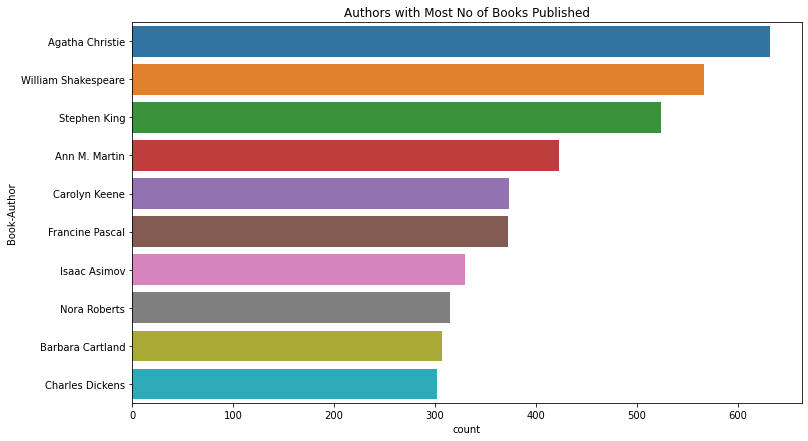

In [57]:
# Top Authors
plt.figure(figsize=(12,7))
sns.countplot(y='Book-Author',data=books_df,order=pd.value_counts(books_df['Book-Author']).iloc[:10].index);
plt.title('Authors with Most No of Books Published');

* Agatha Christie is the Author with most no of books Published  followed by William Shakespeare and Stephen king. 

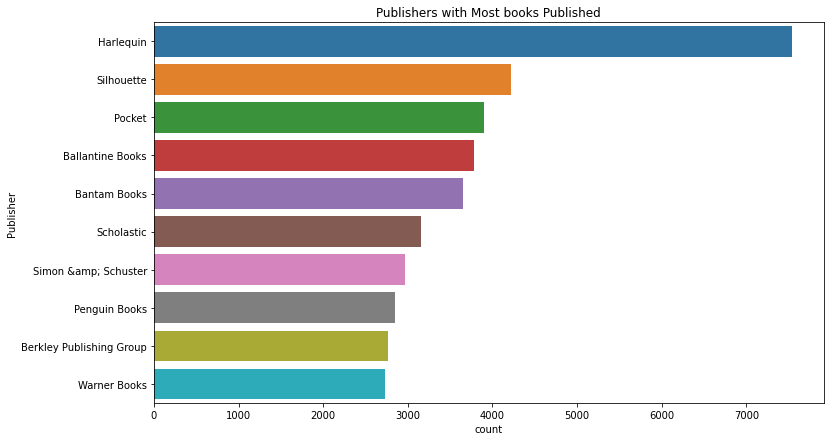

In [59]:
# Top Publishers
plt.figure(figsize=(12,7))
sns.countplot(y='Publisher',data=books_df,order=pd.value_counts(books_df['Publisher']).iloc[:10].index)
plt.title('Publishers with Most books Published');

* Harlequin is the Publisher with most no of books published followed by Silhouette.